In [3]:
import pandas as pd
import numpy as np

categorical = pd.read_csv("../files_for_lab/categorical.csv")
numerical = pd.read_csv('../files_for_lab/numerical.csv')
target = pd.read_csv('../files_for_lab/target.csv')

In [4]:
data = pd.concat([categorical,numerical,target],axis=1)
data = data.drop(['TARGET_D'],axis=1)

In [5]:
data.dtypes

STATE       object
CLUSTER      int64
HOMEOWNR    object
GENDER      object
DATASRCE     int64
             ...  
CONTROLN     int64
HPHONE_D     int64
RFA_2F       int64
CLUSTER2     int64
TARGET_B     int64
Length: 338, dtype: object

In [6]:
from sklearn.utils import resample

category_0 = data[data['TARGET_B'] == 0]
category_1 = data[data['TARGET_B'] == 1]

category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [7]:
# X-y Split

X = data_downsampled.drop('TARGET_B', axis=1)
y = data_downsampled['TARGET_B']

# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# Splitting my numerical values

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X_train_num = X_train.select_dtypes(include=numerics)
X_test_num = X_test.select_dtypes(include=numerics)

X_train_cat = X_train.select_dtypes(include=object)
X_test_cat = X_test.select_dtypes(include=object)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [9]:
# Encoding Categorical Values

One_Hot_Encoding_train = pd.get_dummies(X_train_cat)
One_Hot_Encoding_test = pd.get_dummies(X_test_cat)

In [12]:
# Reuniting my X matrixes

X_train = pd.concat([X_train_num,One_Hot_Encoding_train],axis=1)
X_test = pd.concat([X_test_num,One_Hot_Encoding_test],axis=1)

X_test.shape

(2422, 361)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6390418502202643
0.5672997522708505


In [14]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)

In [15]:
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.5848007396713162


In [16]:
cross_val_scores

array([0.57496561, 0.58321871, 0.60797799, 0.58046768, 0.59779614,
       0.57438017, 0.5661157 , 0.60330579, 0.56198347, 0.59779614])

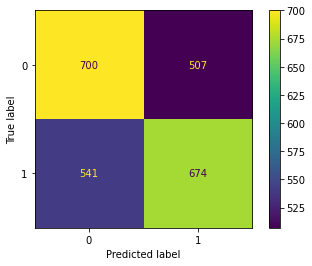

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
# If we optimize for the false negatives (507) and minimize that value using our recall value as an evaluation parameter,
# we can ensure that we miss the least ammount of possible donors. When we send a letter costing ~70cents to a non donor,
# our net loss is the cost of the letter. Whereas if we don't send a letter to a person that would be donating, our net
# loss is the value of that possible donation minus the letter cost - which would indubitably result in a higher value
# than the guaranteed loss of ~70cents.

# We should advise the charity to send letters to all positives (even possible false positives) as this would result in
# in a better outcome for our donations.